In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
df_spam = pd.read_csv("data/models/classification/email.csv")
df_spam.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small


In [5]:
mod = smf.logit(data = df_spam, formula = "spam ~ num_char").fit()

Optimization terminated successfully.
         Current function value: 0.299210
         Iterations 8


In [6]:
mod.params

Intercept   -1.798738
num_char    -0.062071
dtype: float64

In [8]:
y_pred = mod.predict()

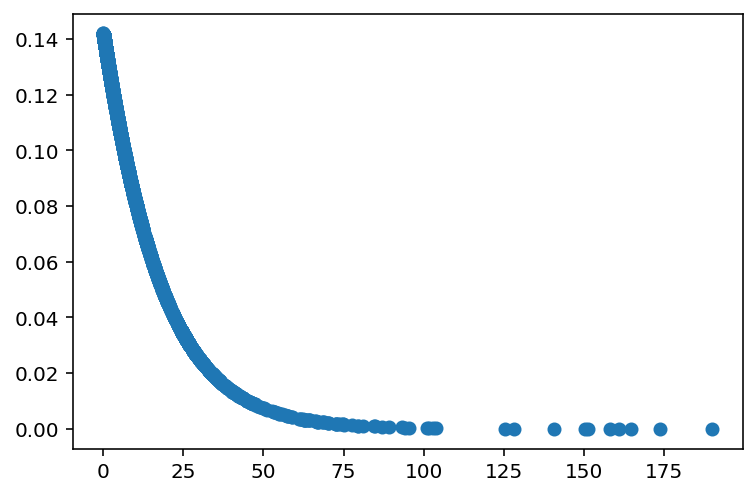

In [9]:
plt.scatter(df_spam['num_char'], mod.predict())

In [24]:
df_spam['spam'].value_counts() / len(df_spam)

0    0.906401
1    0.093599
Name: spam, dtype: float64

In [25]:
## Fit a model
mod_spam = smf.logit(data = df_spam, formula = "spam ~ winner + num_char + re_subj").fit()
## Get predictions
y_pred = mod_spam.predict()
y_pred[0:5]

Optimization terminated successfully.
         Current function value: 0.271057
         Iterations 9


array([0.09574442, 0.10092006, 0.11889704, 0.08528721, 0.17338154])

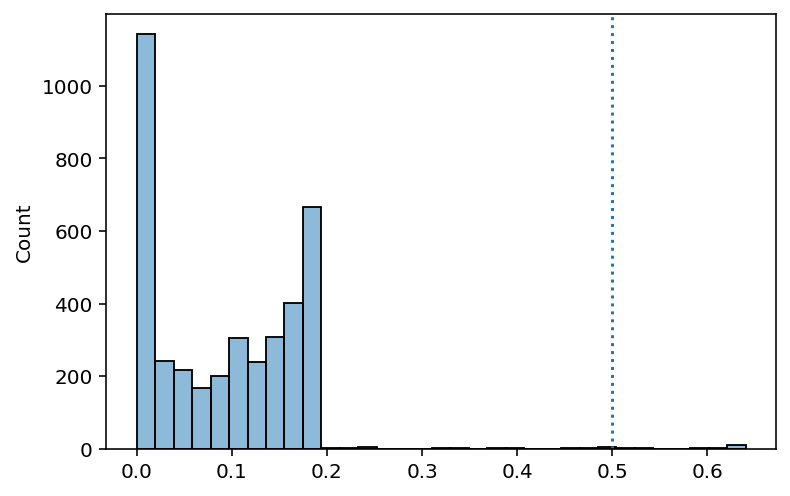

In [26]:
## Visualize predicted probabilities
sns.histplot(x = y_pred, alpha = .5)
plt.axvline(x = .5, linestyle = "dotted")

In [27]:
labels_t5 = y_pred > .5
print("Proportion classified as spam: {x}".format(x = round(labels_t5.mean(), 4)))
print("Proportion actual spam: {x}".format(x = round(df_spam['spam'].mean(), 4)))
print("Accuracy: {x}".format(x = round(accuracy_score(labels_t5, df_spam['spam']), 2)))

Proportion classified as spam: 0.0048
Proportion actual spam: 0.0936
Accuracy: 0.91


<AxesSubplot:xlabel='t', ylabel='accuracy'>

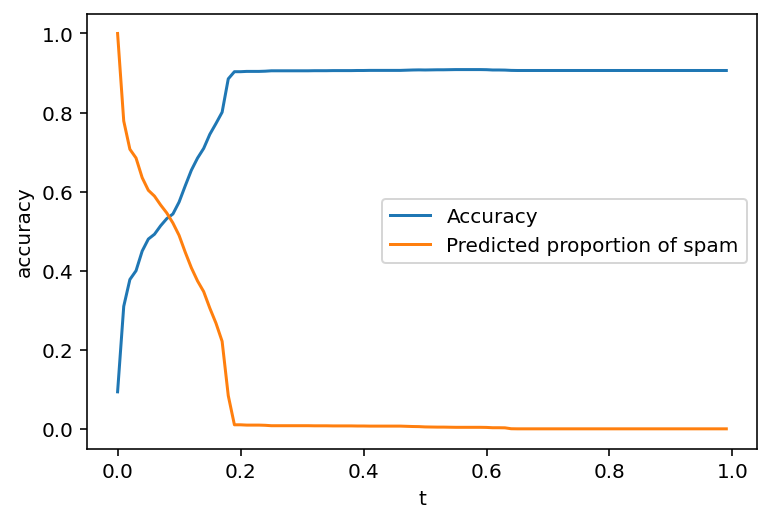

In [28]:
results = []
for t in np.arange(0, 1, .01):
    labels = y_pred > t
    accuracy = accuracy_score(labels, df_spam['spam'])
    results.append({'accuracy': accuracy, 't': t, 'pred_spam': labels.mean()})
df_results = pd.DataFrame(results)
sns.lineplot(data = df_results, x = "t", y = "accuracy", label = "Accuracy")
sns.lineplot(data = df_results, x = "t", y = "pred_spam", label = "Predicted proportion of spam")

In [29]:
## Demo: true data
true_labels = np.array([1, 0, 0, 1, 0, 0])
## Demo: predicted labels
predicted_labels = np.array([1, 0, 1, 1, 0, 1])

In [30]:
N = len(true_labels[true_labels==0])
print(N)

4


In [31]:
FP = len(predicted_labels[(predicted_labels==1) & (true_labels == 0)])


In [34]:
FP / N

0.5

In [35]:
## Number of true negatives
P = len(true_labels[true_labels==1])
## Number of FP
FN = len(predicted_labels[(predicted_labels==0) & (true_labels == 1)])

In [36]:
FN / P

0.0